In [1]:
# Question1
import csv
import numpy as np

#1.1 Read the downloaded file into a matrix M(mXn).
M = np.genfromtxt('digitData1.csv',delimiter=',')    
    
rowlen=len(M)
collen=len(M[0])

#1.2 Create an empty numpy array X with m rows and n-1 columns
X = np.empty(shape=(rowlen,collen-1))

#1.3 Assign all m rows and first n-1 columns of M into X.
X= np.array(M)[:,0:collen-1]

#1.4 Create a numpy vector trueLabels and assign n-th column of M into that
trueLabels=np.array(M[:,-1])

#1.5 Print dimensions of M, X and trueLabels.
print ('The shape of the matrix M is :', M.shape)
print(' ')
print ('The shape of the numpy array X is :', X.shape)
print(' ')
print ('The shape of numpy vector trueLabels is :', trueLabels.shape)

The shape of the matrix M is : (1669, 65)
 
The shape of the numpy array X is : (1669, 64)
 
The shape of numpy vector trueLabels is : (1669,)


In [0]:
#Additional Work for understanding data

import pandas as pd

#Summary of features
Dataset = pd.DataFrame(X)
summarydata=Dataset.describe(include='all')
print(summarydata.transpose())

#Summary of labels
Labelset = pd.DataFrame(trueLabels)
summarylabel=Labelset.describe(include='all')
print(summarylabel.transpose())

     count       mean       std  min   25%   50%   75%   max
0   1669.0   0.000000  0.000000  0.0   0.0   0.0   0.0   0.0
1   1669.0   0.304374  0.910035  0.0   0.0   0.0   0.0   8.0
2   1669.0   5.141402  4.778589  0.0   1.0   4.0   9.0  16.0
3   1669.0  11.816058  4.265227  0.0  10.0  13.0  15.0  16.0
4   1669.0  11.893349  4.261183  0.0  10.0  13.0  15.0  16.0
5   1669.0   5.850210  5.695856  0.0   0.0   4.0  11.0  16.0
6   1669.0   1.403835  3.384424  0.0   0.0   0.0   0.0  16.0
7   1669.0   0.138406  1.075403  0.0   0.0   0.0   0.0  15.0
8   1669.0   0.005992  0.097757  0.0   0.0   0.0   0.0   2.0
9   1669.0   2.005392  3.209413  0.0   0.0   0.0   3.0  16.0
10  1669.0  10.325944  5.430876  0.0   6.0  12.0  15.0  16.0
11  1669.0  11.937687  3.956411  0.0   9.0  13.0  15.0  16.0
12  1669.0  10.264230  4.706396  0.0   7.0  11.0  15.0  16.0
13  1669.0   8.246255  6.037939  0.0   2.0   9.0  14.0  16.0
14  1669.0   1.866986  3.599933  0.0   0.0   0.0   2.0  16.0
15  1669.0   0.110845  0

Some obeservations from data Analsis:

The dataset has 1669 instances with 65 columns.
The last column contains the true label with digits from 0-9
The columns 1-64 contain the features
Column 1 has got only a value of 0 in all instances

The scatter diagram of data point for columns 1 and 2 with cluster cetroids marked with red x:
----------------------------------------------------------------------------------------------


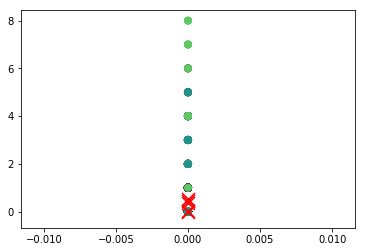


The scatter diagram of data point for columns 2 and 3 with cluster cetroids marked with red x:
----------------------------------------------------------------------------------------------


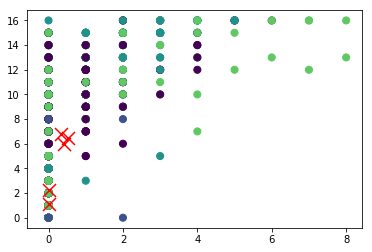

The adjusted rand index (ARI) and Adjusted mutual information (AMI) after single iteration of k-means using Euclidean distance measure :
------------------------------------------------------------------------------------------------------
The ARI is : 0.38428038201994674
The AMI is : 0.5690895653025276

The average adjusted rand index (ARI) and Adjusted mutual information (AMI) after 50 iteration of k-means:
----------------------------------------------------------------------------------------------------------
The average adjusted rand index (ARI) after 50 iterations of k-means run using Euclidean distance measure is: 0.34705523305302394

The adjusted mutual information (AMI) after 50 iterations of k-means run using Euclidean distance measure is: 0.5222603474953408


In [0]:
#Question 2
#2.1 Next perform K-means clustering with 5 clusters using Euclidean distance as similarity measure. 

from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics

kmeans = KMeans(init='random',n_clusters=5, n_init=1 , max_iter=300).fit(X)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Visualize the datta points
plt.scatter(X[:, 0], X[:,1], c=labels, s=50, cmap='viridis')
 # Visualize the centroids
print("The scatter diagram of data point for columns 1 and 2 with cluster cetroids marked with red x:")
print("----------------------------------------------------------------------------------------------")
plt.scatter(centroids[:, 0],centroids[:, 1], marker = "x", s=169, color='r')
plt.show()  

print('')
plt.scatter(X[:,1], X[:,2], c=labels, s=50, cmap='viridis')   
# Visualize the centroids
print("The scatter diagram of data point for columns 2 and 3 with cluster cetroids marked with red x:")
print("----------------------------------------------------------------------------------------------")
plt.scatter(centroids[:, 1],centroids[:, 2], marker = "x", s=169, color='r')
plt.show()   

#2.2 Evaluate the clustering performance using adjusted rand index (ARI) and adjusted mutual information. 
print("The adjusted rand index (ARI) and Adjusted mutual information (AMI) after single iteration of k-means using Euclidean distance measure :")
print("------------------------------------------------------------------------------------------------------")
ari=metrics.adjusted_rand_score(trueLabels, labels)
ami=metrics.adjusted_mutual_info_score(trueLabels, labels, average_method='arithmetic')

print('The ARI is :', ari)
print('The AMI is :', ami)

#2.3 Report the clustering performance averaged over 50 random initializations of K-means. 
ari_sum=0
ami_sum=0

for i in range(50):
    kmeans = KMeans(init='random',n_clusters=5, n_init=1 ,max_iter=300).fit(X)

    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_

    ari=metrics.adjusted_rand_score(trueLabels, labels)
    ari_sum= ari_sum + ari 
    
    ami=metrics.adjusted_mutual_info_score(trueLabels, labels, average_method='arithmetic')
    ami_sum= ami_sum + ami 
    
average_ari=ari_sum/50
average_ami=ami_sum/50

print("")
print("The average adjusted rand index (ARI) and Adjusted mutual information (AMI) after 50 iteration of k-means:")
print("----------------------------------------------------------------------------------------------------------")
print('The average adjusted rand index (ARI) after 50 iterations of k-means run using Euclidean distance measure is:',average_ari)
print("")
print('The adjusted mutual information (AMI) after 50 iterations of k-means run using Euclidean distance measure is:',average_ami)

Q3) If we have an ARI value of 0.7 after a single run of K-means clustering with 'Kmeans++' initializaton for any data set then what will be the value of averaged ARI over 20 repetitions. Explain why?

The ARI value is bound to remain .7 or possibly increase. K-means++ algorithm assigns the first centroid randomly and other centroids given the first. Which means the model converges faster and is also found to have better performance compared to k-means clustering with random initialization. Thus making the optimum solution closer to the actual one. Therefore, the average ARI value after 20 iterations is going to be better than a single run.

reference: http://ilpubs.stanford.edu:8090/778/1/2006-13.pdf

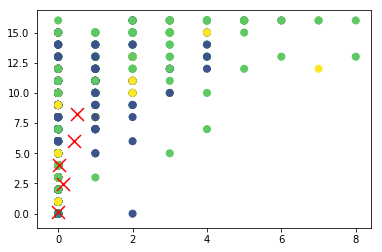

The Adjusted rand index (ARI) and  Adjusted mutual information (AMI) for single k-means++ run
The ARI is : 0.2972974841047602
The AMI is : 0.4761522531726172
ITERATION 0
ari is 0.3044296967903885
ITERATION 1
ari is 0.35999354129146954
ITERATION 2
ari is 0.3517937934870084
ITERATION 3
ari is 0.34353197305108296
ITERATION 4
ari is 0.3460449952936167
ITERATION 5
ari is 0.32680865586197255
ITERATION 6
ari is 0.3807002577084445
ITERATION 7
ari is 0.36966879287027266
ITERATION 8
ari is 0.34531895099379256
ITERATION 9
ari is 0.3511155237881957
ITERATION 10
ari is 0.2978393792822849
ITERATION 11
ari is 0.3577369234322978
ITERATION 12
ari is 0.34300975310284115
ITERATION 13
ari is 0.35941134624849275
ITERATION 14
ari is 0.3682142425239802
ITERATION 15
ari is 0.32640950737121355
ITERATION 16
ari is 0.33414947489723973
ITERATION 17
ari is 0.36581015114820103
ITERATION 18
ari is 0.3022399730123467
ITERATION 19
ari is 0.3274762163483952
The average Adjusted rand index (ARI) after 20 iterations of k

In [0]:
#3 Additional work for queston 3
# If we have an ARI value of 0.7 after a single run of K-means clustering with 'Kmeans++' initializaton 
#    for any data set then what will be the value of averaged ARI over 20 repeatations. 
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics

kmeans = KMeans(init='k-means++',n_clusters=5, n_init=1, max_iter=300).fit(X)
labels = kmeans.labels_
labelsarray = np.asarray(labels)

# Visualize the datta points
plt.scatter(X[:, 1], X[:,2], c=labels, s=50, cmap='viridis')
    
# Visualize the centroids
plt.scatter(centroids[:, 1],centroids[:, 2], marker = "x", s=169, color='r')
plt.show()   

print("The Adjusted rand index (ARI) and  Adjusted mutual information (AMI) for single k-means++ run")
ari=metrics.adjusted_rand_score(trueLabels, labels)
ami=metrics.adjusted_mutual_info_score(trueLabels, labels, average_method='arithmetic')

print('The ARI is :', ari)
print('The AMI is :', ami)

ari_sum=0
ami_sum=0

for i in range(20):
    kmeans = KMeans(init='k-means++',n_clusters=5, n_init=1, max_iter=300).fit(X)

    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_

    ari=metrics.adjusted_rand_score(trueLabels, labels)
    print ('ITERATION',i)
    print ('ari is',ari)
    ari_sum= ari_sum + ari 
    
    ami=metrics.adjusted_mutual_info_score(trueLabels, labels, average_method='arithmetic')
    ami_sum= ami_sum + ami 
    
average_ari=ari_sum/20
average_ami=ami_sum/20

print('The average Adjusted rand index (ARI) after 20 iterations of k-means++ run is:',average_ari)

In [0]:
#Question 4
#4.1 Repeat K-means clustering with 5 clusters using a similarity measure other than Euclidean distance (you are free to use other libraries).

#!pip install nltk
import nltk
from nltk.cluster import KMeansClusterer

NUM_CLUSTERS=5
kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance)
assigned_clusters = kclusterer.cluster(X, assign_clusters=True)

print("The Adjusted rand index (ARI) and  Adjusted mutual information (AMI) for single k-means run using cosine distance")
ari=metrics.adjusted_rand_score(trueLabels, assigned_clusters)
ami=metrics.adjusted_mutual_info_score(trueLabels, assigned_clusters, average_method='arithmetic')

print('The ARI is :', ari)
print('The AMI is :', ami)

#4.2 Evaluate the clustering performance over 50 random initializations of K-means using adjusted rand index and adjusted mutual information.

ari_sum=0
ami_sum=0

for i in range(50):
    NUM_CLUSTERS=5
    kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance)
    assigned_clusters = kclusterer.cluster(X, assign_clusters=True)

    ari=metrics.adjusted_rand_score(trueLabels, assigned_clusters)
    ari_sum= ari_sum + ari 
    
    ami=metrics.adjusted_mutual_info_score(trueLabels, assigned_clusters, average_method='arithmetic')
    ami_sum= ami_sum + ami 
    
average_ari=ari_sum/50
average_ami=ami_sum/50

print("")
print("The average adjusted rand index (ARI) and Adjusted mutual information (AMI) after 50 iteration of k-means using cosine distance measure:")
print("----------------------------------------------------------------------------------------------------------")
print('The average adjusted rand index (ARI) after 50 iterations of k-means run using cosine distance measure is:',average_ari)
print("")
print('The adjusted mutual information (AMI) after 50 iterations of k-means run using cosine distance measure is:',average_ami)

The Adjusted rand index (ARI) and  Adjusted mutual information (AMI) for single k-means run using cosine distance
The ARI is : 0.3444212393180863
The AMI is : 0.5044724044309649

The average adjusted rand index (ARI) and Adjusted mutual information (AMI) after 50 iteration of k-means using cosine distance measure:
----------------------------------------------------------------------------------------------------------
The average adjusted rand index (ARI) after 50 iterations of k-means run using cosine distance measure is: 0.34579151839365097

The adjusted mutual information (AMI) after 50 iterations of k-means run using cosine distance measure is: 0.5191137549482047


Q 4.3) Report the clustering performance and compare it with the results obtained in step 2.

The average adjusted rand index (ARI) after 50 iterations of k-means run using Euclidean distance measure is: 0.34705523305302394

The adjusted mutual information (AMI) after 50 iterations of k-means run using Euclidean distance measure is: 0.5222603474953408

The average adjusted rand index (ARI) after 50 iterations of k-means run using cosine distance measure is: 0.34579151839365097

The adjusted mutual information (AMI) after 50 iterations of k-means run using cosine distance measure is: 0.5191137549482047

From above, we can see that the ARI and AMI have both decreased very slightly with the cosine distance measure as compared to Euclidean distance measure, however they are  similar.

(1669, 64)

Variance explained by Principal components in descending order
[1.19786178e-01 9.56911879e-02 8.46367071e-02 6.67402030e-02
 4.86575020e-02 4.20397752e-02 3.96907028e-02 3.42827430e-02
 3.01738817e-02 2.89467346e-02 2.78575704e-02 2.55575355e-02
 2.27756487e-02 2.26365859e-02 2.16799940e-02 1.92826146e-02
 1.76879374e-02 1.63635846e-02 1.58905670e-02 1.50758139e-02
 1.32470604e-02 1.24205913e-02 1.17543697e-02 1.06732036e-02
 9.59640489e-03 9.24310672e-03 8.73421713e-03 8.47528899e-03
 8.03272752e-03 7.28312209e-03 7.16258539e-03 6.95906328e-03
 6.51983123e-03 6.40174347e-03 5.94670668e-03 5.69073068e-03
 5.12096600e-03 4.72495279e-03 4.38807745e-03 4.07011004e-03
 3.96725768e-03 3.85376913e-03 3.54297162e-03 3.40399777e-03
 3.25117567e-03 3.02872484e-03 2.83130402e-03 2.71118030e-03
 2.50261352e-03 2.26469831e-03 2.08750943e-03 1.92189368e-03
 1.89853904e-03 1.82839462e-03 1.60634858e-03 1.53790666e-03
 1.45986262e-03 1.35055553e-03 1.21468738e-03 1.04987722e-03
 7.8840528

Text(0, 0.5, 'Variance captured')

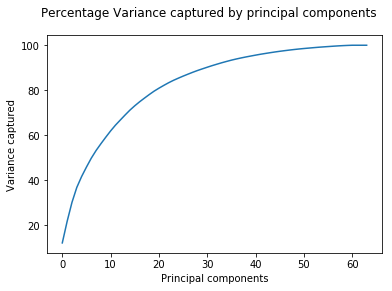

In [2]:
#5.1 Perform PCA.
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics

#normalize our data
from sklearn.preprocessing import scale
Xnorm = scale(X)

print(X.shape)

from sklearn.decomposition import PCA
pca = PCA(n_components=64)
pca.fit(Xnorm)
projected = pca.transform(Xnorm)

#The amount of variance that each PC explains
var= pca.explained_variance_ratio_
print('')
print("Variance explained by Principal components in descending order")
print(var)

#4.2 Plot the captured variance with respect to increasing latent dimensionality. 
print('')
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print('Cumulative variance percentage explained by principal components')
print(var1)
print('')

fig = plt.figure()
plt.plot(var1)
fig.suptitle('Percentage Variance captured by principal components', fontsize=12)
plt.xlabel("Principal components")
plt.ylabel("Variance captured")

Q5.3) What is the minimum dimension that captures at least 95% variance?

We need a minimum of 40 dimension to capture at least 95% variance

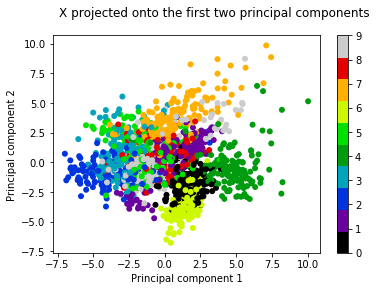

In [7]:
#!pip install matplotlib
#6.1 Create a scatter plot with each of the total rows of X projected onto the first two principal components. 
#6.2 In other words, the horizontal axis should be v1, the vertical axis v2, and each individual should be projected
#    onto the subspace spanned by v1 and v2. Your plot must use a different color for each digit and include a legend.

import matplotlib.pyplot as plt
pca_2 = PCA(2)  # project from 64 to 2 dimensions
projected_2 = pca_2.fit_transform(Xnorm)
#print(X.shape)
#print(projected_2.shape)

#plt.scatter(projected[:, 0], projected[:, 1],c=trueLabels, edgecolor='none', alpha=0.5)
fig = plt.figure()
plt.scatter(projected_2[:, 0], projected_2[:, 1],c=trueLabels, edgecolor='none', cmap=plt.cm.get_cmap('nipy_spectral',10))
fig.suptitle('X projected onto the first two principal components', fontsize=12)
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.colorbar();